# Runge-Kutta Methods & Explicit Linear Multistep Methods

In [1]:
# importing libraries
import numpy as np
import math
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

In [57]:
# Definition of RHS of IVP and time-stepping methods
# The RHS f(t,y)
def dydt(t, y):
    return t-y

# Explicit Runge-Kutta 4th-order Method
def erk4(t,w,h):
    # stages
    s1 = dydt(t, w)
    s2 = dydt()
    s3 = dydt()
    s4 = dydt()
    
    # the ERK4 method
    phi = ( )*(s1 + s2 + s3 + s4)
    return phi 

# Explicit Trapezoid Method
def trap(t,w,h):
    # the trapezoid method
    # y(i+1) = y(i) + h*phi
    phi = 0.5*(dydt(t,w) + dydt(t + h,w + h*dydt(t,w)))
    return phi

# Adams-Bashforth 2-step Method
def ab2(t1,w1,t2,w2):
    # the AB2 Method
    # y(i+1) = y (i) + h*0.5*phi
    phi = 0.5*(3*dydt() - dydt())
    return phi

# Unstable Explicit 2-step Method
def use2(t1,w1,t2,w2):
    # the Method
    # y(i+1) = -y(i) + 2*y(i-1) +h*phi
    phi = 0.5*(5*dydt(t1,w1) + dydt(t2,w2))
    return phi

# Weakly-stable Explicit 2-step Method
def wse2(t,w):
    # the Method
    # y(i+1) = y(i-1) + h*phi
    phi = 2*dydt(t,w) 
    return phi  

# Unstable Explicit 2-step Method from class
def norootcond(t,w):
    # the Method
    # y(i+1) = -4*y(i) + 5*y(i-1) + h*phi
    phi = 2*dydt(t,w) 
    return phi     

In [54]:
# Time-stepping routine
# Use with dydt to evaluate rhs of differential equation
# Input: interval inter, initial value y0, number of steps n
# Output: time steps t, approximate solution w
# Usage: tstep(a,b,y_0,n)
# Example: tstep(0,1,1,10)
def tstep(a,b,y0,n):

    # initialize/define
    t    = np.zeros(n+1) # independent var
    w    = np.zeros(n+1) # dependent var
    h    = (b-a)/n       # step size
    t[0] = a             # initial condition
    w[0] = y0            # initial condition
    
    # # Trapezoid Method
    # for i in range(1,n+1):
    #     t[i] = t[i-1] + h
    #     w[i] = w[i-1] + h*trap(t[i-1],w[i-1],h)
    
    # # ERK4
    # for i in range(1,n+1):
    #     t[i] = t[i-1] + h
    #     w[i] = w[i-1] + h*erk4(t[i-1],w[i-1],h)

    # 2-step Methods
    # Start-up phase using 1-step explicit trapezoid method
    t[1] = t[0] + h
    w[1] = w[0] + h*trap(t[0],w[0],h)

    
    for i in range(2,n+1):
        t[i] = t[i-1] + h
        # AB2
        # w[i] = w[i-1] + h*ab2(t[i-1],w[i-1],t[i-2],w[i-2])

        # USE2
        # w[i] = -w[i-1] + 2*w[i-2] +h*use2(t[i-1],w[i-1],t[i-2],w[i-2])    
        
        # WSE2
        w[i] = w[i-2] + h*wse2(t[i-1],w[i-1])   
        
        # No Root Condition
        # w[i] = -4*w[i-1] + 5*y[i-2] + h*norootcond(t[i-2],w[i-2])         
    
    return t,w

            
    

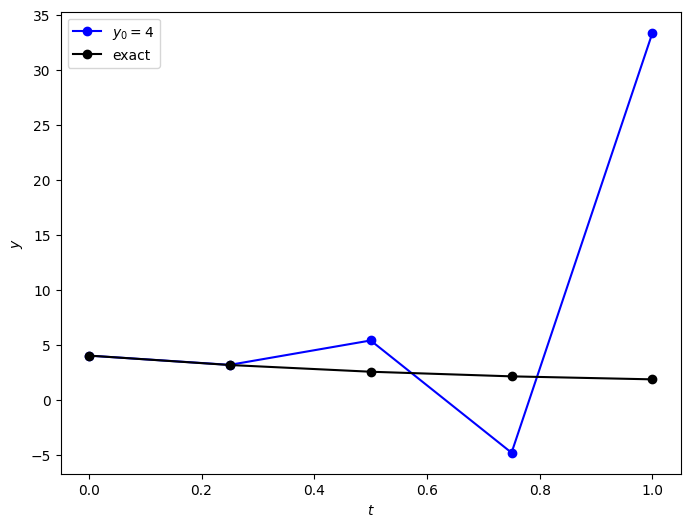

In [56]:
# Solution curves 
# erk4 approximation
[t10,w10]   = tstep(0,1,4,10)

# Exact solution
y = 5*np.exp(-t10) + t10 - 1 

plt.figure(figsize=(8, 6))
plt.plot(t10,w10,'-o',color='blue',label = r'$y_0 = 4$')
plt.plot(t10,y,'-o',color='black',label = 'exact')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')

plt.legend()
# plt.savefig("my_plot.pdf", format='pdf', bbox_inches='tight')


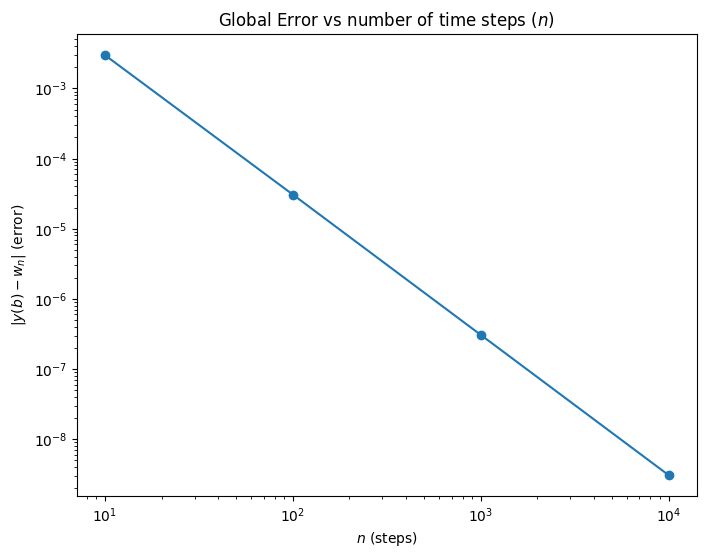

In [53]:
# evaluation of erk4 for decreasing values of step size h
# and corresponding plots.
[t100,w100]     = tstep(0,1,4,100)
[t1000,w1000]   = tstep(0,1,4,1000)
[t10000,w10000] = tstep(0,1,4,10000)

# Global Error e at t = b for decreasing (increasing) h (n).
w1 = [w10[-1], w100[-1], w1000[-1], w10000[-1]]
e = np.abs(y[-1] - w1)
n = [10,100,1000,10000]

plt.figure(figsize=(8, 6))
plt.loglog(n,e,'-o')
plt.xlabel(r'$n$ (steps)')
plt.ylabel(r'$|y(b) - w_{n}|$ (error)')
plt.title(r'Global Error vs number of time steps ($n$)')
plt.savefig("error_plot.pdf", format='pdf', bbox_inches='tight')